In [1]:
import warnings
def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-0.5, np.max(X[:,d0])+0.5
        miny, maxy = np.min(X[:,d1])-0.5, np.max(X[:,d1])+0.5
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None or len(conts)<2:
            #conts = list(classes)
            vmin,vmax = classes[0]-eps,classes[-1]+eps
        else:            
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None or len(conts)<2:            
            conts = sorted([-1+eps,0,1-eps])
        else:
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 50)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return extent

In [1]:
import numpy as np

Xtest = np.loadtxt("Xtest.csv", delimiter=' ')
Xtrain = np.loadtxt("Xtrain.csv", delimiter=' ' )
Ytrain = np.loadtxt("Ytrain.csv", delimiter=' ')

In [2]:
print(Xtrain.shape)
print(Ytrain.shape)

(3000, 784)
(3000,)


There are 3000 rows (images) with corespoinding 3000 labels. 

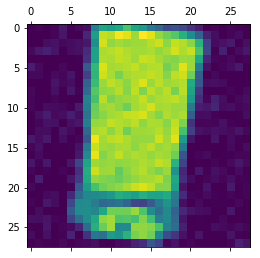

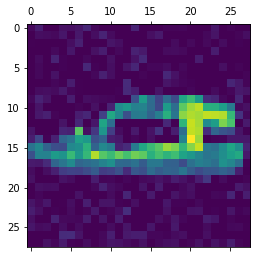

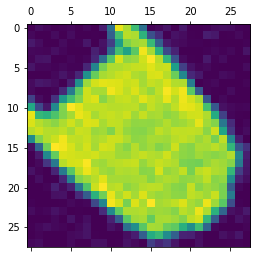

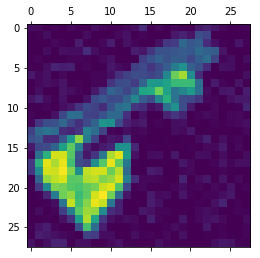

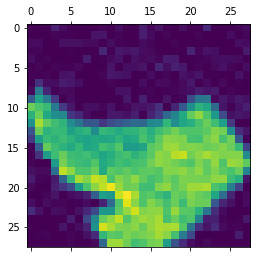

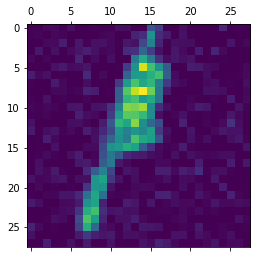

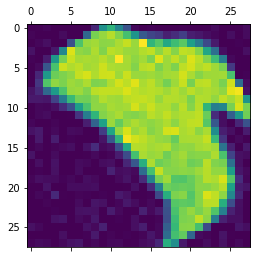

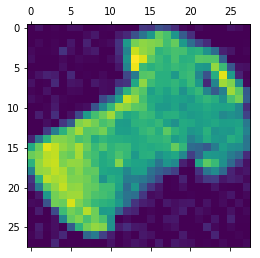

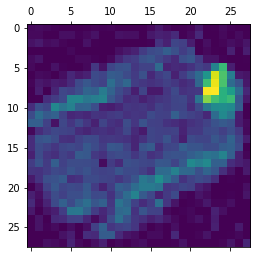

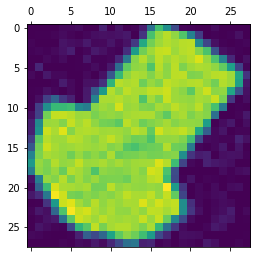

In [4]:
import matplotlib.pyplot as plt

pos = Xtrain[Ytrain == 1]
neg = Xtrain[Ytrain == -1]
for i in range(10,15): 
    image_pos = np.reshape(pos[i], (28,28))
    image_neg = np.reshape(neg[i], (28,28))
    plt.matshow(image_pos)
    plt.matshow(image_neg)

In [5]:
np.unique(Ytrain, return_counts=True)

(array([-1.,  1.]), array([1821, 1179]))

1821 negatives and 1179 positive labels

1 iv) If the random classifier could at mo

In [7]:
1821/3000 * 1821/3000  + 1179/3000 * 1179/3000

0.522898

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

sknn = KNeighborsClassifier(n_neighbors=1)

skf = StratifiedKFold(n_splits=5)

scores = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)

In [36]:
print(scores)
# Accuracy basic summary
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores.mean(), scores.std())

[0.77833333 0.75333333 0.74       0.75833333 0.74      ]
Accuracy: 0.75 (+/- 0.03)
0.7539999999999999 0.01416568624058385


In [19]:
# Scaling
from sklearn import preprocessing
scaling = preprocessing.StandardScaler().fit(Xtrain)
Xscale = scaling.transform(Xtrain)

scaled_scores = cross_val_score(sknn, Xscale, Ytrain, cv=skf)

In [33]:
print(scaled_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scaled_scores.mean(), scaled_scores.std() * 2))
print(scaled_scores.mean(), scaled_scores.std())
# Accuracy is mildly better - higer accuracy with slightly lower standard deviation.

[0.74333333 0.75333333 0.77       0.77833333 0.75666667]
Accuracy: 0.76 (+/- 0.02)
0.7603333333333333 0.012400716825158862


In [34]:
# MinMax Scaler
min_max_scaler = preprocessing.MinMaxScaler()
Xtrain_minmax = min_max_scaler.fit_transform(Xtrain)

minmax_scores = cross_val_score(sknn, Xtrain_minmax, Ytrain, cv=skf)

In [35]:
print(minmax_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (minmax_scores.mean(), minmax_scores.std() * 2))
print(minmax_scores.mean(), minmax_scores.std())
# Accuracy is no better than with the unproccessde data, yet slightly lower standard deviation. 
# Still inferior to scaling.

[0.77166667 0.75166667 0.74       0.76       0.74      ]
Accuracy: 0.75 (+/- 0.02)
0.7526666666666667 0.01213809430402207


In [38]:
# MaxAbs Scaler - must be centered at zero a priori

demeaning = preprocessing.StandardScaler(with_std=False).fit(Xtrain)
Xdemeaned = scaling.transform(Xtrain)
max_abs_scaler = preprocessing.MaxAbsScaler()
Xtrain_maxabs = max_abs_scaler.fit_transform(Xdemeaned)

maxabs_scores = cross_val_score(sknn, Xtrain_maxabs, Ytrain, cv=skf)

In [40]:
print(maxabs_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (maxabs_scores.mean(), maxabs_scores.std() * 2))
print(maxabs_scores.mean(), maxabs_scores.std())
# Due to lowest mean - worse predictor, yet the smallers s.d by construction. 
# Still no real imporovement over the simple scaling. 

[0.755      0.75166667 0.74333333 0.76       0.73333333]
Accuracy: 0.75 (+/- 0.02)
0.7486666666666666 0.009392668535736943


Data is not sparse, hence sparsity transformation will not be applied.

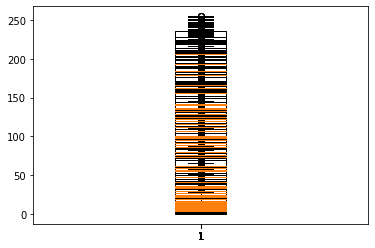

In [59]:
# Checking for outliers

from scipy import stats
for i in range(784):
    print(stats.mstats.mquantiles(Xtrain[:][i])
          
for i in range(5):
    plt.boxplot(Xtrain[:][i])

In [60]:
# Robust Scaling
robust_scaling = preprocessing.RobustScaler().fit(Xtrain)
Xrobust = robust_scaling.transform(Xtrain)

robust_scores = cross_val_score(sknn, Xrobust, Ytrain, cv=skf)

In [61]:
print(robust_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (robust_scores.mean(), robust_scores.std() * 2))
print(robust_scores.mean(), robust_scores.std())
# Outliers are unlikelly given the nature of the data (pixels).
# Returns a worse accuracy - extreme values helps to classify

[0.72333333 0.76666667 0.74166667 0.735      0.75166667]
Accuracy: 0.74 (+/- 0.03)
0.7436666666666667 0.014734690736866903


In [62]:
# Uniform distribution transformation

quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
Xuniform = quantile_transformer.fit_transform(Xtrain)

uniform_scores = cross_val_score(sknn, Xuniform, Ytrain, cv=skf)

In [63]:
print(uniform_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (uniform_scores.mean(), uniform_scores.std() * 2))
print(uniform_scores.mean(), uniform_scores.std())
# Mildly better than scaling

[0.78666667 0.75666667 0.75166667 0.755      0.75833333]
Accuracy: 0.76 (+/- 0.03)
0.7616666666666666 0.012692955176439823


In [69]:
normal_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
Xnormal = normal_transformer.fit_transform(Xtrain)

normal_scores = cross_val_score(sknn, Xnormal, Ytrain, cv=skf)

In [70]:
print(normal_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (normal_scores.mean(), normal_scores.std() * 2))
print(normal_scores.mean(), normal_scores.std())
# terrible

[0.64333333 0.66833333 0.65666667 0.67166667 0.665     ]
Accuracy: 0.66 (+/- 0.02)
0.6609999999999999 0.010143416036468634


In [75]:
BoxCox = preprocessing.PowerTransformer(method='box-cox', standardize=False)

# due to the zero values in the data
Xboxcox = BoxCox.fit_transform(Xtrain+1)

boxcox_scores = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)

In [76]:
print(boxcox_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (boxcox_scores.mean(), boxcox_scores.std() * 2))
print(boxcox_scores.mean(), boxcox_scores.std())
# not too bad, but not better than simple scaling or uniform disribution

[0.77833333 0.75333333 0.74       0.75833333 0.74      ]
Accuracy: 0.75 (+/- 0.03)
0.7539999999999999 0.01416568624058385


Need to try normalization too.

In [95]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []
cv_std = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xscale, Ytrain, cv=skf, scoring='accuracy')
    cv_scores.append((k,scores.mean()))
    cv_std.append((k,scores.std()))

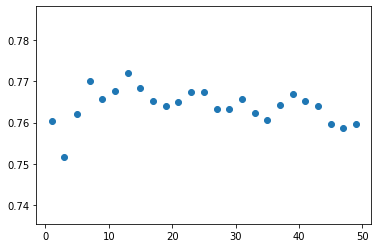

In [96]:
zip(*cv_scores)
plt.scatter(*zip(*cv_scores))
plt.show()

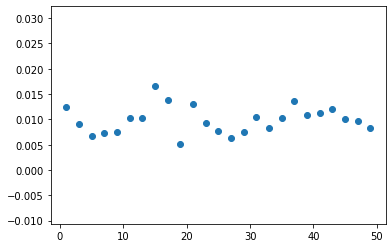

In [97]:
zip(*cv_std)
plt.scatter(*zip(*cv_std))
plt.show()

In [98]:
# creating odd list of K for KNN
neighbors = list(range(50, 100, 2))

# empty list that will hold cv scores
cv_scores_next = []
cv_std_next = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xscale, Ytrain, cv=skf, scoring='accuracy')
    cv_scores_next.append((k,scores.mean()))
    cv_std_next.append((k,scores.std()))

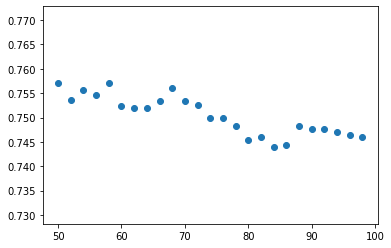

In [99]:
zip(*cv_scores_next)
plt.scatter(*zip(*cv_scores_next))
plt.show()

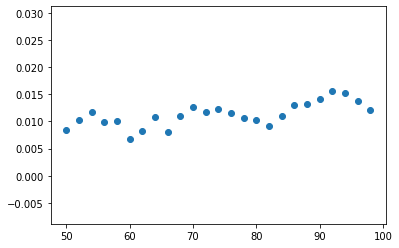

In [100]:
zip(*cv_std_next)
plt.scatter(*zip(*cv_std_next))
plt.show()

In [106]:
print(cv_scores)

[(1, 0.7603333333333333), (3, 0.7516666666666667), (5, 0.7619999999999999), (7, 0.7699999999999999), (9, 0.7656666666666666), (11, 0.7676666666666667), (13, 0.772), (15, 0.7683333333333333), (17, 0.7653333333333332), (19, 0.764), (21, 0.765), (23, 0.7673333333333334), (25, 0.7673333333333334), (27, 0.7633333333333334), (29, 0.7633333333333333), (31, 0.7656666666666666), (33, 0.7623333333333333), (35, 0.7606666666666666), (37, 0.7643333333333333), (39, 0.767), (41, 0.7653333333333333), (43, 0.764), (45, 0.7596666666666666), (47, 0.7586666666666666), (49, 0.7596666666666667)]


Test 12 and 14 now. k=3 seems to be the best

In [107]:
# creating odd list of K for KNN
neighbors = list(range(12, 15, 1))

# empty list that will hold cv scores
cv_scores_mid = []
cv_std_mid = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xtrain, Ytrain, cv=skf, scoring='accuracy')
    cv_scores_mid.append((k,scores.mean()))
    cv_std_mid.append((k,scores.std()))

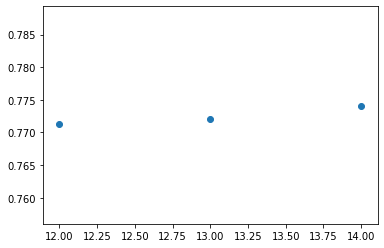

[(12, 0.7713333333333333), (13, 0.772), (14, 0.774)]


In [109]:
zip(*cv_scores_mid)
plt.scatter(*zip(*cv_scores_mid))
plt.show()
print(cv_scores_mid)

so choose k=14

In [13]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores_def = []
cv_std_def = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xtrain, Ytrain, cv=skf, scoring='accuracy')
    cv_scores_def.append((k,scores.mean()))
    cv_std_def.append((k,scores.std()))

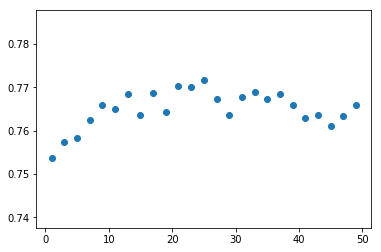

[(1, 0.7536536194082021), (3, 0.7573208314467539), (5, 0.7583297314714763), (7, 0.7623291823958771), (9, 0.7659947435039172), (11, 0.7649952907276595), (13, 0.7683319666628704), (15, 0.7636652944406327), (17, 0.7686630833233796), (19, 0.7643314175872711), (21, 0.7703303064730735), (23, 0.7699941981320318), (25, 0.7716569749730786), (27, 0.767329193507019), (29, 0.7636664074066872), (31, 0.767663630547122), (33, 0.7689964092492849), (35, 0.7673330777770679), (37, 0.7683314064761292), (39, 0.7659969620285982), (41, 0.762996401841857), (43, 0.7636641759190071), (45, 0.760996398138143), (47, 0.7633319574035854), (49, 0.7660008500023612)]


In [14]:
zip(*cv_scores_def)
plt.scatter(*zip(*cv_scores_def))
plt.show()
print(cv_scores_def)

In [15]:
# creating odd list of K for KNN
neighbors = list(range(19, 28, 1))

# empty list that will hold cv scores
cv_scores_zoom = []
cv_std_zoom = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xscale, Ytrain, cv=skf, scoring='accuracy')
    cv_scores_zoom.append((k,scores.mean()))
    cv_std_zoom.append((k,scores.std()))

In [ ]:
zip(*cv_scores_zoom)
plt.scatter(*zip(*cv_scores_zoom))
plt.show()
print(cv_scores_zoom)
# still does not match scaled k=14 performance. But close

In [20]:
# Perceptron

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state = 0)

# IF y if binary or multiclass, Statified is used once cv=n is specified
perceptron_scores = cross_val_score(perceptron, Xscale, Ytrain, cv=5)
print(perceptron_scores.mean(), perceptron_scores.std())

0.6346668601857226 0.03916055404005618


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Per

In [21]:
print(perceptron_scores)

[0.67387687 0.605      0.575      0.645      0.67445743]


In [34]:
from sklearn.svm import SVC

LSVM = SVC(C = 1.0, class_weight = 'balanced', kernel = 'linear')

#scores = cross_val_score(LSVM, Xtrain, Ytrain, cv=5)
#print(scores)

#Zp = LSVM.decision_function(Xtrain)

print( "Train Accuracy", np.mean(Ypredict==Ytrain))

Train Accuracy 0.8466666666666667


In [ ]:
LSVM.fit(Xscale,Ytrain)
Ypredict = LSVM.predict(Xscale)

print( "Train Accuracy", np.mean(Ypredict==Ytrain))

In [32]:
LSVMscore = cross_val_score(LSVM, Xscale, Ytrain, cv=5)
print(LSVMscore)

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.63560732 0.65       0.64666667 0.68166667 0.68280467]


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
polySVM = SVC(C = 1, kernel = 'poly', degree = 2,  class_weight = 'balanced', coef0 = 1.0)

clf.fit(X,Y)

In [ ]:
clf = SVC(C = 1.0, kernel = 'linear', class_weight = 'balanced')